In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("btc-usd-2024.csv")
data = data.drop(columns='total_volume')
data = data.drop(columns='market_cap')
data

,snapped_at,price
0,1,42208.202176
1,2,44168.681187
2,3,44994.673887
3,4,42821.558989
4,5,44195.578562
...,...,...
90,91,69702.308747
91,92,71246.951441
92,93,69785.925038
93,94,65440.419226


In [5]:
data.shape

data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   snapped_at  95 non-null     int64  
 1   price       95 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


,snapped_at,price
count,95.000000,95.000000
mean,48.000000,53894.721441
std,27.568098,11292.029704
min,1.000000,39504.730058
25%,24.500000,43078.415415
50%,48.000000,51553.096713
75%,71.500000,65829.958494
max,95.000000,73097.767027


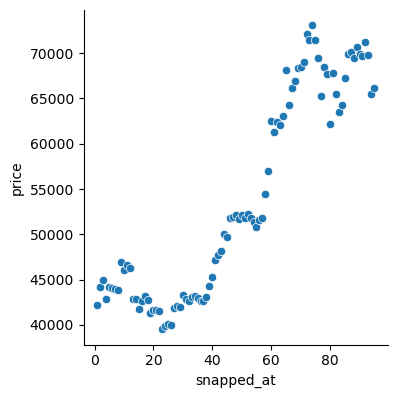

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['snapped_at'], 
             y_vars='price', size=4, aspect=1, kind='scatter')
plt.show()

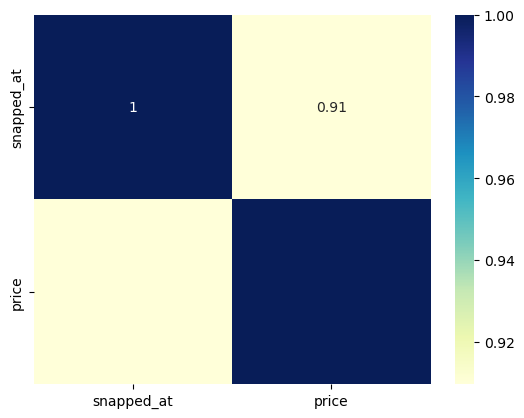

In [8]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [9]:
X = data['snapped_at']
y = data['price']

In [10]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [11]:
X_train
y_train


63    63053.105439
21    41541.899457
54    50841.081095
33    43170.658562
91    71246.951441
          ...     
79    62132.517379
87    69435.750403
67    66944.876391
24    40123.671058
8     46936.185561
Name: price, Length: 66, dtype: float64

In [12]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [13]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const         37072.905195
snapped_at      359.308391
dtype: float64

In [14]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     331.1
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           5.46e-27
Time:                        14:49:55   Log-Likelihood:                -647.21
No. Observations:                  66   AIC:                             1298.
Df Residuals:                      64   BIC:                             1303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.707e+04   1139.296     32.540      0.000    3.48e+04    3.93e+04
snapped_at   359.3084     19.746     18.196      0.000     319.861     398.756
==============================================================================
Omnibus:                       17.137   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.210
Skew:                           0.182   Prob(JB):                        0.122
Kurtosis:                       1.817   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

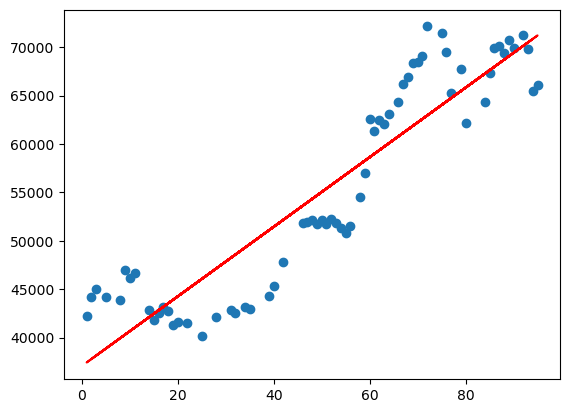

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 37070 + 359.3084*X_train, 'r')
plt.show()

In [18]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

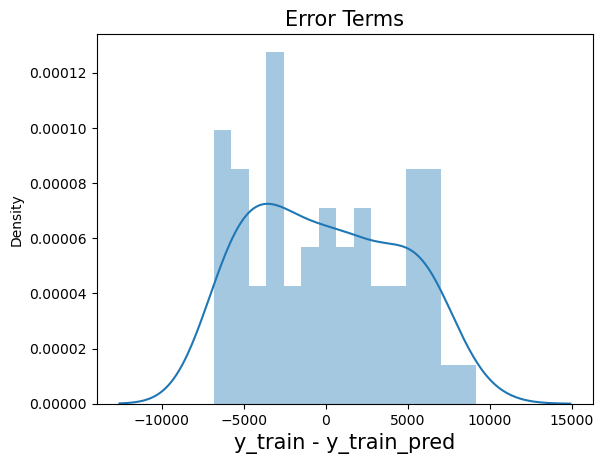

In [19]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

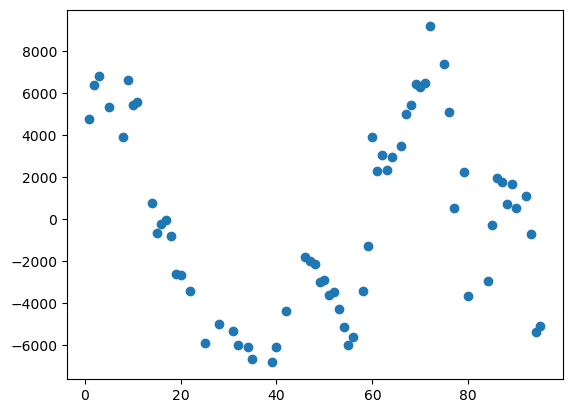

In [20]:
plt.scatter(X_train,res)
plt.show()

In [21]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

80    66176.884853
72    63302.417726
26    46774.231747
29    47852.156920
43    52882.474392
90    69769.968761
35    50008.007265
44    53241.782783
22    45336.998184
64    60427.950600
5     39228.755540
32    48930.082092
11    41384.605885
56    57553.483473
28    47492.848529
77    65098.959680
36    50367.315656
73    63661.726117
82    66895.501635
81    66536.193244
20    44618.381402
23    45696.306575
6     39588.063930
3     38510.138758
40    51804.549219
12    41743.914276
25    46414.923357
37    50726.624047
42    52523.166001
dtype: float64

In [22]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7793376290319367

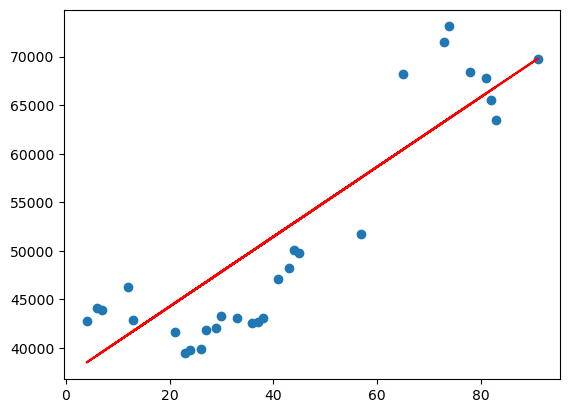

In [23]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)


In [26]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(66, 1)
(29, 1)


In [27]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [28]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 37072.90519458323
Slope : [359.30839085]


In [29]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8380163432903664
0.7793376290319369
